In [82]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine 
from PIL import ImageColor
import matplotlib.pyplot as plt
from dask import dataframe as dd
import panel as pn
pn.extension('tabulator')

import hvplot.pandas

<center>image creation = done |
slider = wip |
algorithm = haven't started |
web visualization = (ノ´ロ`)ノ<center>

<h1><center>Data Import and Formatting<h1><center>

In [83]:
engine = create_engine('sqlite:///placeData.db')

In [93]:
tp = pd.read_sql('place78', engine)
tp.head()

,index,timestamp,user_id,pixel_color,coordinate
0,0,2022-04-01 17:38:30.498 UTC,9fGRoY1L5mjWkG9ccBMQVWzdZsuqGl+9SLfxgWjn6elFFZ...,#00A368,"698,918"
1,1,2022-04-01 17:38:30.506 UTC,AisQ+8TPvQM33hB4gf7gmVhFS1N/EGlYICgmMt6zUsDfd0...,#000000,"998,86"
2,2,2022-04-01 17:38:30.508 UTC,io9zeD2F8BKWWXCrEEoa/CwTX/8ir9qw8SsHPy3NHBWHx6...,#000000,"873,885"
3,3,2022-04-01 17:38:30.511 UTC,v38Z0Pg8P1F/S4/nAorfoydMS22xObntvkHL9ohTwPfbHG...,#000000,"396,79"
4,4,2022-04-01 17:38:30.513 UTC,tYDDTJcCrJfpl8Xc4VSx+oybuZen2KXKaIIMVnqcWpTNFs...,#2450A4,"937,960"


In [96]:
tp = tp[tp["timestamp"].str.contains('timestamp')==False]

In [97]:
tp.sort_values(by='timestamp').reset_index
tp

,index,timestamp,user_id,pixel_color,coordinate
0,0,2022-04-01 17:38:30.498 UTC,9fGRoY1L5mjWkG9ccBMQVWzdZsuqGl+9SLfxgWjn6elFFZ...,#00A368,"698,918"
1,1,2022-04-01 17:38:30.506 UTC,AisQ+8TPvQM33hB4gf7gmVhFS1N/EGlYICgmMt6zUsDfd0...,#000000,"998,86"
2,2,2022-04-01 17:38:30.508 UTC,io9zeD2F8BKWWXCrEEoa/CwTX/8ir9qw8SsHPy3NHBWHx6...,#000000,"873,885"
3,3,2022-04-01 17:38:30.511 UTC,v38Z0Pg8P1F/S4/nAorfoydMS22xObntvkHL9ohTwPfbHG...,#000000,"396,79"
4,4,2022-04-01 17:38:30.513 UTC,tYDDTJcCrJfpl8Xc4VSx+oybuZen2KXKaIIMVnqcWpTNFs...,#2450A4,"937,960"
...,...,...,...,...,...
1841529,1841529,2022-04-01 19:13:51.466 UTC,px5FC6rVyLaXYm6YVLDGRq9UCX17ZLA6ex20X25frBhZCr...,#FFFFFF,"816,421"
1841530,1841530,2022-04-01 19:13:51.468 UTC,G179m7nuLOTRSo/mfELFJFsZVjqD5lYiTf62xJURolrBDn...,#000000,"630,909"
1841531,1841531,2022-04-01 19:13:51.469 UTC,fis0q2E/RiecDZsQJWGVbi/UJPoymsYVjRW12v4A2NsJcI...,#000000,"783,127"
1841532,1841532,2022-04-01 19:13:51.472 UTC,D9NSW3Tkb0Y+4/mnvfJfI/0qZDJQXfaLY1cDkWnjFlAOen...,#FF4500,"422,528"


In [98]:
tp["user_id"] = tp["user_id"].astype("category")
tp["timestamp"] = pd.to_datetime(tp["timestamp"])
#runTime = 3m 52s

In [99]:
tp.memory_usage(deep=True)

Index           14732272
index           14732272
timestamp       14732272
user_id        110402869
pixel_color    117858176
coordinate     117444240
dtype: int64

<h1><center>BELOW IS IMAGING<h1><center>

In [100]:
#litereally nothing was accomplished -_- 4 hours...

tp.rename({'timestamp': 'ts', 'pixel_color' : 'color'}, axis=1, inplace=True)
tp = tp.sort_values(by='ts').reset_index(drop=True)
#tp['ts'] = pd.to_numeric(tp.ts)
tp[['x_coordinate','y_coordinate']] = tp.coordinate.str.split(",",expand=True)
tp["x_coordinate"] = pd.to_numeric(tp["x_coordinate"])
tp["y_coordinate"] = pd.to_numeric(tp["y_coordinate"])
tp = tp.drop(columns=['coordinate'], axis=1)
tp['x_coordinate'] = tp['x_coordinate'].astype(np.int64)
tp['y_coordinate'] = tp['y_coordinate'].astype(np.int64)
#tp['ts'] = tp['ts'].astype(float)
tp = tp.rename(columns={'color':'hex'})
tp.head()
temp = tp['hex']

def hex_to_rgb(hexColor):
    """Return color as #rrggbb for the given color values."""
    return ImageColor.getcolor(hexColor, "RGB")


rgb = rgb=temp.apply(lambda hexColor: hex_to_rgb(hexColor))

0    (0, 163, 104)
1        (0, 0, 0)
2        (0, 0, 0)
3        (0, 0, 0)
4    (36, 80, 164)
Name: hex, dtype: object

In [101]:
rgb = pd.DataFrame(rgb)
temp = tp
temp = temp.rename(columns={'hex':'hex1'})
temp = pd.concat([temp, rgb], axis=1)
temp = temp.rename(columns={'hex':'rgb'})
temp = temp.rename(columns={'hex1':'hex'})
tp = temp #I DON'T KNOW WHY I HAVE TO DO THIS BS BUT IT'S THE ONLY WAY THIS WORKS ??????????????
tp.head()

,index,ts,user_id,hex,x_coordinate,y_coordinate,rgb
0,0,2022-04-01 17:38:30.498000+00:00,9fGRoY1L5mjWkG9ccBMQVWzdZsuqGl+9SLfxgWjn6elFFZ...,#00A368,698,918,"(0, 163, 104)"
1,1,2022-04-01 17:38:30.506000+00:00,AisQ+8TPvQM33hB4gf7gmVhFS1N/EGlYICgmMt6zUsDfd0...,#000000,998,86,"(0, 0, 0)"
2,2,2022-04-01 17:38:30.508000+00:00,io9zeD2F8BKWWXCrEEoa/CwTX/8ir9qw8SsHPy3NHBWHx6...,#000000,873,885,"(0, 0, 0)"
3,3,2022-04-01 17:38:30.511000+00:00,v38Z0Pg8P1F/S4/nAorfoydMS22xObntvkHL9ohTwPfbHG...,#000000,396,79,"(0, 0, 0)"
4,4,2022-04-01 17:38:30.513000+00:00,tYDDTJcCrJfpl8Xc4VSx+oybuZen2KXKaIIMVnqcWpTNFs...,#2450A4,937,960,"(36, 80, 164)"


In [102]:
def place_at_timestamp(tp, ts):
    """
    Uses the raw data source to construct a dataset representing the state of r/Place at the
    given UNIX timestamp.
    """
    pivot = np.argmin(tp['ts'] < ts)
    history = tp.iloc[:pivot]
    return history


def construct_image_matrix(tiles):
    """
    Given the tile data provided by the `place_at_timestamp` function, returns r/Place at that time
    as a matrix.
    """
    mat = np.zeros((2001, 2001, 3))
    mat.fill(255)
    for coord, val in zip(tiles.values[:, 3:5], tiles.values[:, 5]):
        mat[coord[1], coord[0]] = val
    return mat


In [103]:
tp_length =  len(tp.index)
splits = round(tp_length / 200)
print(splits)
x = 0
count = 0

while x <= 200:
    pic = "imgPlace"+str(tp['ts'].iloc[count])
    fig = plt.figure(figsize=(200, 200))
    plt.imshow(construct_image_matrix(place_at_timestamp(tp, tp['ts'].iloc[count])))
    count += splits
    x += 1
    #plt.close(fig)
    plt.savefig("C:\\Users\\danie\\Desktop\\Coding\\r-place\\2\\img\\"+pic)
    plt.axis('off')


9208


In [110]:
df = pn.state.cache['data'] = tp.copy()

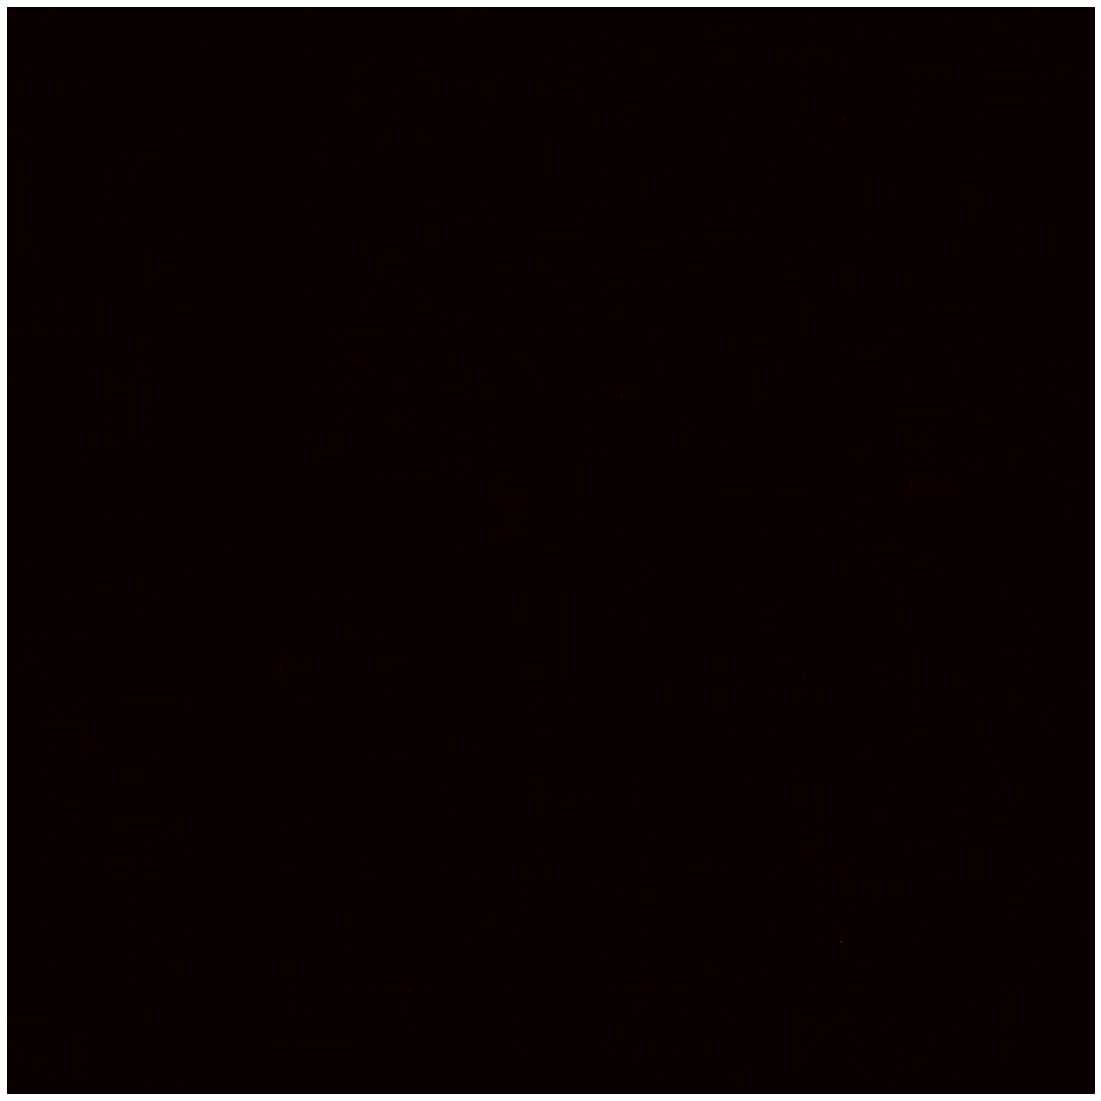

In [113]:
hist,_,_ = np.histogram2d(df['x_coordinate'], df['y_coordinate'], bins=(2000,2000))

# show heatmap by plt
# you can use plt to save the figure
fig = plt.figure(figsize=(20,20))
plt.imshow(hist,cmap='hot')
plt.axis('off')
plt.show()